In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2) (1).json


{'kaggle (2) (1).json': b'{"username":"anudeepdivi","key":"332e87256fa9dda71fe5572e44669633"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d samlearner/letterboxd-movie-ratings-data

Dataset URL: https://www.kaggle.com/datasets/samlearner/letterboxd-movie-ratings-data
License(s): Attribution 4.0 International (CC BY 4.0)
letterboxd-movie-ratings-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/letterboxd-movie-ratings-data.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("dataset extracted")

dataset extracted


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ratings = pd.read_csv('/content/ratings_export.csv')
ratings.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


In [ ]:
user = pd.read_csv('/content/users_export.csv')
user.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8139 entries, 0 to 8138
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                8139 non-null   object 
 1   display_name       7832 non-null   object 
 2   num_ratings_pages  4747 non-null   float64
 3   num_reviews        8139 non-null   int64  
 4   username           8139 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 318.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11078167 entries, 0 to 11078166
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   movie_id    object
 2   rating_val  int64 
 3   user_id     object
dtypes: int64(1), object(3)
memory usage: 338.1+ MB


In [ ]:
user.head()

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy


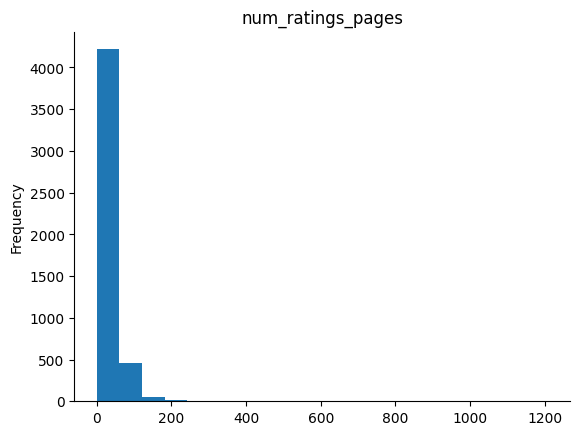

In [ ]:
# @title num_ratings_pages

from matplotlib import pyplot as plt
user['num_ratings_pages'].plot(kind='hist', bins=20, title='num_ratings_pages')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
movie = pd.read_csv('/content/movie_data.csv', lineterminator='\n')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285504 entries, 0 to 285503
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _id                   285504 non-null  object 
 1   genres                274872 non-null  object 
 2   image_url             264407 non-null  object 
 3   imdb_id               243802 non-null  object 
 4   imdb_link             243802 non-null  object 
 5   movie_id              285502 non-null  object 
 6   movie_title           283339 non-null  object 
 7   original_language     274872 non-null  object 
 8   overview              261248 non-null  object 
 9   popularity            274872 non-null  float64
 10  production_countries  274872 non-null  object 
 11  release_date          271050 non-null  object 
 12  runtime               270055 non-null  float64
 13  spoken_languages      274872 non-null  object 
 14  tmdb_id               279917 non-null  float64
 15  

In [ ]:
movie.head()

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018.0


In [ ]:
movs = movie.loc[:,["movie_id","movie_title","genres"]]

In [ ]:
movs = movs.dropna(subset=['movie_id','movie_title'])
movs['genres'] = movs['genres'].fillna('Others')
movs['genres'] = movs['genres'].str.replace(r'^\[\]$|^$|^"|"$', 'Others')

<ipython-input-14-ba4232388715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movs['genres'] = movs['genres'].fillna('Others')


In [ ]:
import re

In [ ]:
def clean_genre(genre):
  # Replace unwanted characters within genres while preserving commas
  return re.sub(r'[^\w\s,]', '', genre)

In [ ]:
movs['genres'] = movs['genres'].apply(clean_genre)
movs['genres'] = movs['genres'].str.replace(',', ', ')

In [ ]:
df = pd.merge(movs, ratings)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11068098 entries, 0 to 11068097
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   movie_id     object
 1   movie_title  object
 2   genres       object
 3   _id          object
 4   rating_val   int64 
 5   user_id      object
dtypes: int64(1), object(5)
memory usage: 506.7+ MB


In [ ]:
data = df.drop(columns=['_id'])
data = data.loc[:,['user_id','rating_val','movie_title','movie_id','genres']]

In [ ]:
data.head()

,user_id,rating_val,movie_title,movie_id,genres
0,loureviews,7,Football Freaks,football-freaks,"Music, Animation"
1,m_penalosa,8,Aftermath,aftermath-1960,
2,vadekawa,9,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
3,vrizov,6,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
4,erich4chi,8,Where Chimneys Are Seen,where-chimneys-are-seen,Drama


In [ ]:
ratings.dropna(inplace=True)

In [ ]:
ratings.isnull().sum()

,0
_id,0
movie_id,0
rating_val,0
user_id,0


In [ ]:
data.head()

,user_id,rating_val,movie_title,movie_id,genres
0,loureviews,7,Football Freaks,football-freaks,"Music, Animation"
1,m_penalosa,8,Aftermath,aftermath-1960,
2,vadekawa,9,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
3,vrizov,6,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
4,erich4chi,8,Where Chimneys Are Seen,where-chimneys-are-seen,Drama


In [ ]:
old_n_users, old_n_movies = ratings["user_id"].nunique(), ratings["movie_id"].nunique()
print(f'old data set have {old_n_users} unique user, {old_n_movies} unique movie, with {len(ratings)} rating.')


user_movie_counts = ratings.groupby('user_id')['movie_id'].nunique()

threshold = 10
users_to_remove = user_movie_counts[user_movie_counts <= threshold].index
ratings = ratings[~ratings['user_id'].isin(users_to_remove)]

n_users, n_movies = ratings["user_id"].nunique(), ratings["movie_id"].nunique()
print(f'new data set have{n_users}  unique user, {n_movies} unique movie, with {len(ratings)} rating.')

old data set have 7477 unique user, 286070 unique movie, with 11078161 rating.
new data set have7366  unique user, 286068 unique movie, with 11077634 rating.


In [ ]:
rating_counts = ratings['rating_val'].value_counts()
rating_counts

,count
rating_val,
8,2174389
6,2162938
7,2033546
5,1113411
4,948409
9,912026
10,752291
3,405437
2,383884


In [ ]:
no_ratings = []
for i, rating in enumerate(rating_counts):
    no_ratings.append(rating_counts.get(i+1, 0))
no_ratings

[191303,
 383884,
 405437,
 948409,
 1113411,
 2162938,
 2033546,
 2174389,
 912026,
 752291]

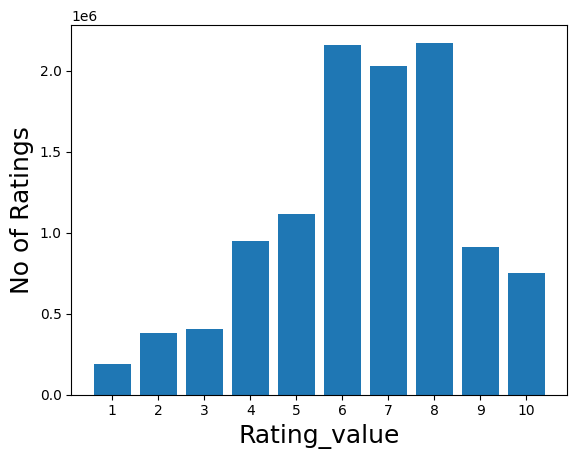

In [ ]:
label = range(1, len(rating_counts) + 1)
index = np.arange(len(label))
plt.bar(index, no_ratings)
plt.xlabel('Rating_value', fontsize=18)
plt.ylabel('No of Ratings', fontsize=18)
plt.xticks(index, label, fontsize=10)
plt.show()

In [ ]:
ratings.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


In [ ]:
df.head()

,movie_id,movie_title,genres,_id,rating_val,user_id
0,football-freaks,Football Freaks,"Music, Animation",5fc6809d6758f69634e02512,7,loureviews
1,aftermath-1960,Aftermath,,5fc58dd56758f69634c9c581,8,m_penalosa
2,where-chimneys-are-seen,Where Chimneys Are Seen,Drama,5fc5815d6758f696346ffe97,9,vadekawa
3,where-chimneys-are-seen,Where Chimneys Are Seen,Drama,5fc588a96758f69634a0dcd4,6,vrizov
4,where-chimneys-are-seen,Where Chimneys Are Seen,Drama,5fc5912d6758f69634e05008,8,erich4chi


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

ratings["transformed_user_id"] = label_encoder.fit_transform(ratings["user_id"])

ratings["transformed_movie_id"] = label_encoder.fit_transform(ratings["movie_id"])

transformed_data = ratings[["transformed_user_id", "transformed_movie_id", "rating_val"]]


In [ ]:
transformed_data

,transformed_user_id,transformed_movie_id,rating_val
0,1698,78839,7
1,1698,137030,7
2,1698,192644,7
3,1698,229052,4
4,1698,140812,5
...,...,...,...
11078162,6872,13644,6
11078163,6872,26741,7
11078164,6872,178973,6
11078165,6872,279998,7


In [ ]:
user_mappings = ratings[["user_id", "transformed_user_id"]].drop_duplicates()
movie_mappings = ratings[["movie_id", "transformed_movie_id"]].drop_duplicates()

In [ ]:
transformed_data.rename(columns={"transformed_user_id": "user_id",
                                 "transformed_movie_id": "movie_id"}, inplace=True)

<ipython-input-35-70502fec0950>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data.rename(columns={"transformed_user_id": "user_id",


In [ ]:
transformed_data

,user_id,movie_id,rating_val
0,1698,78839,7
1,1698,137030,7
2,1698,192644,7
3,1698,229052,4
4,1698,140812,5
...,...,...,...
11078162,6872,13644,6
11078163,6872,26741,7
11078164,6872,178973,6
11078165,6872,279998,7


In [ ]:
user_mappings

,user_id,transformed_user_id
0,deathproof,1698
1012,kurstboy,3913
2019,davidehrlich,1653
4025,adrianbalboa,123
5032,ingridgoeswest,3088
...,...,...
11011645,mateazember,4389
11011886,finnvor1,2365
11012210,daniel,1583
11047422,butterflyfilms,995


In [ ]:
movie_mappings

,movie_id,transformed_movie_id
0,feast-2014,78839
1,loving-2016,137030
2,scripted-content,192644
3,the-future,229052
4,mank,140812
...,...,...
11077853,the-western-world-of-sailor-moon,255699
11077902,shadowplay,195567
11077941,only-always-you,165253
11078032,one-night-stand-ellen-degeneres,164856


In [ ]:
from sklearn.model_selection import train_test_split

X = transformed_data[['user_id', 'movie_id']]
y = transformed_data['rating_val']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
import tensorflow
from tensorflow import keras
from sklearn import preprocessing
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, Dropout, concatenate, multiply, Input
from keras.optimizers import Adam

#COLLABORATIVE FILTERING WITH DEEP LEARNING#

In [ ]:
def create_model(dim_embedding_user = 50, dim_embedding_movie = 50, layer_size = 20):

    # movie embedding
    movie_input = Input(shape=[1],name = 'Movie')
    movie_embedding = Embedding(n_movies+1,dim_embedding_movie,name='Movie-Embedding')(movie_input)
    movie_vec = Flatten(name='movie_flatten')(movie_embedding)
    movie_vec = Dropout(0.2)(movie_vec)

    # user embedding
    user_input = Input(shape=[1],name='User')
    user_embedding = Embedding(n_users+1,dim_embedding_user,name = 'User-Embedding')(user_input)
    user_vec = Flatten(name='user_flatten')(user_embedding)
    user_vec = Dropout(0.2)(user_vec)

    #concatenate flattened values
    concat = concatenate([movie_vec,user_vec])
    concat_dropout = Dropout(0.2)(concat)

    #dense layer
    dense = Dense(layer_size,name='Full-Connected',activation='relu')(concat)
    result = Dense(1,activation='relu',name='Activation')(dense)

    model = Model([user_input,movie_input],result)
    model.summary()
    return model

In [ ]:
hists, models, test_results = {}, [], {}

In [ ]:
model = create_model()
model.compile(optimizer= Adam(learning_rate = 0.002),
              loss= ['mse'],
              metrics=['mean_absolute_error'])
hists["1024-batch-20-epoch"] = model.fit([X_train['user_id'],X_train['movie_id']],
                                    y_train,
                                    batch_size = 1024,
                                    validation_split = 0.1,
                                    epochs = 20,
                                    verbose = 1)
models.append(model)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Movie (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Movie-Embedding           │ (None, 1, 50)          │     14,303,450 │ Movie[0][0]            │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User-Embedding            │ (None, 1, 50)          │        368,350 │ User[0][0]             │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ movie_flatten (Flatten)   │ (None, 50)             │              0 │ Movie-Embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_flatten (Flatten)    │ (None, 50)             │              0 │ User-Embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 50)             │              0 │ movie_flatten[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 50)             │              0 │ user_flatten[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 100)            │              0 │ dropout[0][0],         │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Full-Connected (Dense)    │ (None, 20)             │          2,020 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Activation (Dense)        │ (None, 1)              │             21 │ Full-Connected[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,673,841 (55.98 MB)

 Trainable params: 14,673,841 (55.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7789/7789 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - loss: 4.2952 - mean_absolute_error: 1.4779 - val_loss: 2.2158 - val_mean_absolute_error: 1.1368
Epoch 2/20
7789/7789 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - loss: 2.1506 - mean_absolute_error: 1.1220 - val_loss: 2.0914 - val_mean_absolute_error: 1.1055
Epoch 3/20
7789/7789 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - loss: 2.0239 - mean_absolute_error: 1.0850 - val_loss: 2.0640 - val_mean_absolute_error: 1.0968
Epoch 4/20
7789/7789 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 1.9727 - mean_absolute_error: 1.0686 - val_loss: 2.0468 - val_mean_absolute_error: 1.0906
Epoch 5/20
7789/7789 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 1.9338 - mean_absolute_error: 1.0566 - val_loss: 2.0289 - val_mean_absolute_error: 1.0859
Epoch 6/20
7789/7789 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 1.9043 - mean_absolute_error: 1.0472 - val_loss: 2.0266 - val_mean_absolute_error: 1.0889
Epoch 7/20
7789/7789 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 1.8797 - mean_absol

In [ ]:
hists

{'1024-batch-20-epoch': <keras.src.callbacks.history.History at 0x7af6c483fb20>}

In [ ]:
models

[<Functional name=functional, built=True>]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Get predictions from the model
y_pred = models[0].predict([X_test['user_id'], X_test['movie_id']])

# Step 3: Compute RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Store results in test_results dictionary
test_results["1024-batch-size-20-epoch"] = {
    "RMSE": rmse,
    "MSE": mse,
    "R2Score": r2
}


print("RMSE:", rmse)
print("MSE:", mse)
print("R2Score:", r2)

69236/69236 ━━━━━━━━━━━━━━━━━━━━ 116s 2ms/step
RMSE: 1.410401497405943
MSE: 1.9892323838849262
R2Score: 0.5391468405723572


<Axes: title={'center': '<Functional name=functional, built=True>'}>

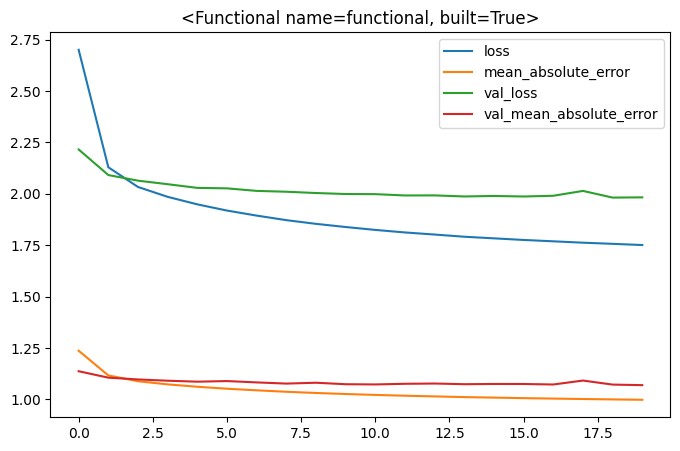

In [ ]:
pd.DataFrame(hists['1024-batch-20-epoch'].history).plot(figsize=(8,5), title=model)

In [ ]:
selected_model = models[0]

In [ ]:
def make_pred(username, moviename):
    input_user_id = user_mappings[user_mappings["user_id"] == username]["transformed_user_id"].iloc[0]
    input_movie_id = movie_mappings[movie_mappings["movie_id"] == moviename]["transformed_movie_id"].iloc[0]
    input_user_id = np.array([input_user_id], dtype=np.int32).flatten()
    input_movie_id = np.array([input_movie_id], dtype=np.int32).flatten()

    return selected_model.predict((input_user_id, input_movie_id), verbose=0)

In [ ]:
username = 'richmond_hill'
size = 500

# List of movies excluding the ones rated by the user
movies = ratings[ratings['user_id'] != username]['movie_id'].to_list()

# Generate a random index and select a slice of movies
random_int = np.random.randint(size, len(movies))

# Initialize a counter for top predictions
top_predictions = []

# Loop through the selected movies and make predictions
for movie in movies[random_int-size:random_int]:
    predicted_rating = make_pred(username, movie)[0][0]
    if predicted_rating > 8.8:
        top_predictions.append((movie, predicted_rating))
        print(f"movie: {movie}, rating: {predicted_rating}")

        # Stop after 10 top predictions
        if len(top_predictions) == 10:
            break

movie: lawrence-of-arabia, rating: 8.908270835876465
movie: stagecoach, rating: 8.99972152709961
movie: johnny-guitar, rating: 9.486403465270996
movie: dekalog, rating: 8.836459159851074
movie: the-grapes-of-wrath, rating: 9.011604309082031
movie: thief, rating: 9.170811653137207
movie: heavens-gate, rating: 8.892313957214355
movie: the-last-command, rating: 8.907082557678223


#HYBRID MODEL OF COLLABORATIVE FILTERING AND CONTENT BASED FILTERING#

In [ ]:
data.head()

,user_id,rating_val,movie_title,movie_id,genres
0,loureviews,7,Football Freaks,football-freaks,"Music, Animation"
1,m_penalosa,8,Aftermath,aftermath-1960,
2,vadekawa,9,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
3,vrizov,6,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
4,erich4chi,8,Where Chimneys Are Seen,where-chimneys-are-seen,Drama


In [ ]:
n_to_drop = 10318098  # Number of rows to drop

# Generate random indices to drop
drop_indices = np.random.choice(data.index, size=n_to_drop, replace=False)

# Drop the rows based on the indices
findat = data.drop(drop_indices)

In [ ]:
findat.shape

(750000, 5)

In [ ]:
empty = (findat['genres'] == '').sum()
print(empty)

10225


In [ ]:
findat['genres'] = findat['genres'].replace('', 'Others')

In [ ]:
final_data = findat.reset_index(drop=True)

In [ ]:
final_data

,user_id,rating_val,movie_title,movie_id,genres
0,m_penalosa,8,Aftermath,aftermath-1960,Others
1,vrizov,6,Where Chimneys Are Seen,where-chimneys-are-seen,Drama
2,stevenmillan,6,Blood Scarab,blood-scarab,Horror
3,schlockvalue,4,The Christine Jorgensen Story,the-christine-jorgensen-story,Drama
4,esoterica,2,The Christine Jorgensen Story,the-christine-jorgensen-story,Drama
...,...,...,...,...,...
749995,maxime1,8,"For 200 Grand, You Get Nothing Now",for-200-grand-you-get-nothing-now,Comedy
749996,richmond_hill,7,The Network,the-network-1979,Others
749997,imzzzy,1,Untangled,untangled-2022,"Drama, Romance"
749998,imzzzy,3,Stalked by a Prince,stalked-by-a-prince,"Thriller, TV Movie"


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
genre_encoder = LabelEncoder()

# Apply Label Encoding
final_data['user_idx'] = user_encoder.fit_transform(final_data['user_id'])
final_data['movie_idx'] = movie_encoder.fit_transform(final_data['movie_id'])
final_data['genre_idx'] = genre_encoder.fit_transform(final_data['genres'])

# Display the first few rows of the DataFrame to verify
final_data.head()


,user_id,rating_val,movie_title,movie_id,genres,genre_idx,movie_idx,user_idx
0,m_penalosa,8,Aftermath,aftermath-1960,Others,4630,3654,4223
1,vrizov,6,Where Chimneys Are Seen,where-chimneys-are-seen,Drama,2619,87837,7023
2,stevenmillan,6,Blood Scarab,blood-scarab,Horror,3953,10469,6338
3,schlockvalue,4,The Christine Jorgensen Story,the-christine-jorgensen-story,Drama,2619,68533,5937
4,esoterica,2,The Christine Jorgensen Story,the-christine-jorgensen-story,Drama,2619,68533,2176


In [ ]:
n_users = len(final_data.user_idx.unique())
n_movies = len(final_data.movie_idx.unique())
n_genres = len(final_data.genre_idx.unique())
print(n_users)
print(n_movies)
print(n_genres)

7354
90257
5798


In [ ]:
final_data


,user_id,rating_val,movie_title,movie_id,genres,genre_idx,movie_idx,user_idx
0,m_penalosa,8,Aftermath,aftermath-1960,Others,4630,3654,4223
1,vrizov,6,Where Chimneys Are Seen,where-chimneys-are-seen,Drama,2619,87837,7023
2,stevenmillan,6,Blood Scarab,blood-scarab,Horror,3953,10469,6338
3,schlockvalue,4,The Christine Jorgensen Story,the-christine-jorgensen-story,Drama,2619,68533,5937
4,esoterica,2,The Christine Jorgensen Story,the-christine-jorgensen-story,Drama,2619,68533,2176
...,...,...,...,...,...,...,...,...
749995,maxime1,8,"For 200 Grand, You Get Nothing Now",for-200-grand-you-get-nothing-now,Comedy,1723,26015,4435
749996,richmond_hill,7,The Network,the-network-1979,Others,4630,75892,5615
749997,imzzzy,1,Untangled,untangled-2022,"Drama, Romance",3056,85347,3065
749998,imzzzy,3,Stalked by a Prince,stalked-by-a-prince,"Thriller, TV Movie",5560,62977,3065


In [ ]:
from keras.layers import Input, Embedding, Flatten, Dropout, Dense, Concatenate
genre_input = Input(shape=[1], name="Genre-Input")
genre_embedding = Embedding(n_genres+1, 10, name="Genre-Embedding")(genre_input)
genre_vec = Flatten(name="Flatten-Genres")(genre_embedding)
genre_vec = Dropout(0.2)(genre_vec)

movie_input = Input(shape=[1], name="Movie-Input")
movie_embedding = Embedding(n_movies+1, 10, name="Movie-Embedding")(movie_input)
movie_vec = Flatten(name="Flatten-Movies")(movie_embedding)
movie_vec = Dropout(0.2)(movie_vec)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 10, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
user_vec = Dropout(0.2)(user_vec)

conc = Concatenate()([user_vec, movie_vec, genre_vec])
#layer dense
fc1 = Dense(400, activation='relu')(conc)
fc2 = Dense(200, activation='relu')(fc1)
fc3 = Dense(100, activation='relu')(fc2)
out = Dense(1)(fc3)
model1 = Model([user_input,movie_input, genre_input], out)
model1.compile('SGD', 'mean_squared_error')
model1.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ User-Input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Movie-Input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Genre-Input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User-Embedding            │ (None, 1, 10)          │         73,550 │ User-Input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Movie-Embedding           │ (None, 1, 10)          │        902,580 │ Movie-Input[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Genre-Embedding           │ (None, 1, 10)          │         57,990 │ Genre-Input[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Flatten-Users (Flatten)   │ (None, 10)             │              0 │ User-Embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Flatten-Movies (Flatten)  │ (None, 10)             │              0 │ Movie-Embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Flatten-Genres (Flatten)  │ (None, 10)             │              0 │ Genre-Embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_32 (Dropout)      │ (None, 10)             │              0 │ Flatten-Users[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_31 (Dropout)      │ (None, 10)             │              0 │ Flatten-Movies[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_30 (Dropout)      │ (None, 10)             │              0 │ Flatten-Genres[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 30)             │              0 │ dropout_32[0][0],      │
│ (Concatenate)             │                        │                │ dropout_31[0][0],      │
│                           │                        │                │ dropout_30[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 400)            │         12,400 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 200)            │         80,200 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 100)            │         20,100 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            101 │ dense_6[0][0]          │
└──────────────────────

 Total params: 1,146,921 (4.38 MB)

 Trainable params: 1,146,921 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train, test = train_test_split(final_data, test_size=0.2, random_state=42)
val, true_test = train_test_split(test, test_size=0.1, random_state=42)

In [ ]:
hists['CBF-CF'] = model1.fit(
                [train.user_idx, train.movie_idx, train.genre_idx], train.rating_val,
                epochs=40, batch_size=128,
                validation_data=([val.user_idx, val.movie_idx, val.genre_idx],
                                 val.rating_val), verbose=1
                    )

Epoch 1/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 55s 11ms/step - loss: 4.4545 - val_loss: 3.1072
Epoch 2/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 2.9154 - val_loss: 2.6766
Epoch 3/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 2.5928 - val_loss: 2.5923
Epoch 4/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 2.4633 - val_loss: 2.5421
Epoch 5/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 2.3595 - val_loss: 2.4869
Epoch 6/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 2.2844 - val_loss: 2.5062
Epoch 7/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 2.2268 - val_loss: 2.4908
Epoch 8/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.1586 - val_loss: 2.4614
Epoch 9/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 2.1314 - val_loss: 2.4293
Epoch 10/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 2.0969 - val_loss: 2.4575
Epoch 11/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 2.0724 - val_loss: 2.4771
Epoch 12/40
4688/4

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict ratings for the test set
y_pred = model1.predict([true_test.user_idx, true_test.movie_idx, true_test.genre_idx])
y_test = true_test.rating_val
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error (MSE): 2.4688
Root Mean Squared Error (RMSE): 1.5712
R² Score: 0.4320


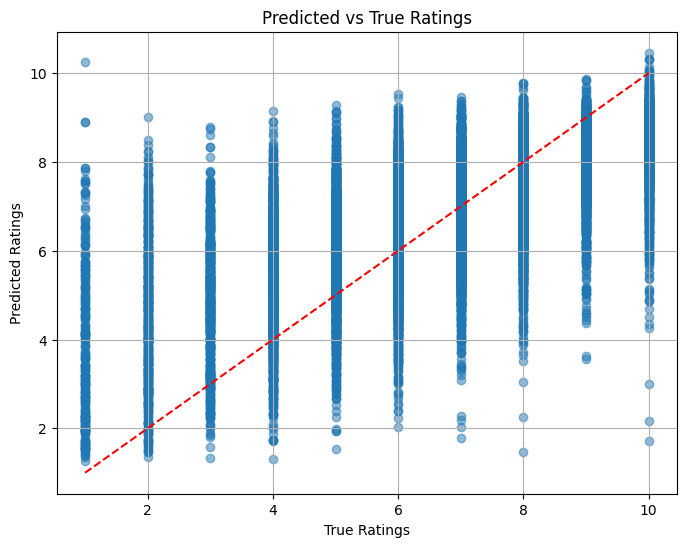

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs True Ratings")
plt.grid(True)
plt.show()


In [ ]:
genre_idx_dict = final_data.set_index("movie_id")["genre_idx"].to_dict()

In [ ]:
# Extract unique user indices and their names
usedict = final_data[["user_id", "user_idx"]].drop_duplicates().set_index("user_id")["user_idx"].to_dict()

# Display the user_mappings dictionary
print(usedict)


{'m_penalosa': 4223, 'vrizov': 7023, 'stevenmillan': 6338, 'schlockvalue': 5937, 'esoterica': 2176, 'tybap': 6867, 'kevin_matthews': 3780, 'foggy': 2424, 'directorvinall': 1793, 'ghettominibar': 2596, 'emperorcupcake': 2116, 'derenzo': 1734, 'jeremiewatson': 3368, 'ingleside': 3079, 'igornolascorm': 3035, 'loureviews': 4152, 'njoythelstcntrl': 4967, 'tonyterror': 6773, 'cevangelista413': 1156, 'bucketreviews': 967, 'psychotic': 5422, 'noahphex': 4976, 'alexfung': 227, 'mazinkaiser19': 4445, 'acervofilmico': 94, 'imzzzy': 3065, 'menonfilm': 4500, 'apeman666': 439, 'yorel1976': 7250, 'alexroy656': 243, 'shawn_stubbs': 6047, 'snowboardjunkie': 6189, 'bacchichiccups': 596, 'vhsmike': 6971, 'tipsfromchip': 6718, 'michaeleternity': 4528, 'mandelbroset': 4279, 'jimmyvon789': 3412, 'dvideostor': 1963, 'adammoody': 104, 'bryanway': 952, 'anne_f_': 395, 'revchu': 5591, 'theportman': 6634, 'samcmac': 5854, 'dirkh': 1797, 'jacksonmaines': 3197, 'v6446v': 6927, 'theactualjase': 6544, 'moviephanatic

In [ ]:
# Extract unique movie indices and their names
movdict = final_data[["movie_id", "movie_idx"]].drop_duplicates().set_index("movie_id")["movie_idx"].to_dict()

# Display the movie dict dictionary
print(movdict)


{'aftermath-1960': 3654, 'where-chimneys-are-seen': 87837, 'blood-scarab': 10469, 'the-christine-jorgensen-story': 68533, 'desperately-seeking-santa': 19119, 'a-deadly-adoption': 1389, 'omega-cop': 50025, 'australien-skies': 7049, 'no-minor-vices': 48842, 'hotel-del-monte': 32356, 'cinderella-2000-1': 14684, 'tusalava': 84369, 'the-last-will-and-testament-of-rosalind-leigh': 73950, 'say-it-isnt-so': 58589, 'lily-and-jim': 40584, 'land-2013': 39020, 'killers-2010': 37710, 'swing-your-partners': 64839, 'earth-vs-the-spider-2001': 21665, 'in-the-shadow-of-women': 34370, 'they-call-me-jeeg': 81828, 'the-pope-of-greenwich-village': 77015, 'projekt-a-a-journey-to-anarchist-projects-in-europe': 54379, 'conspiracy-the-trial-of-the-chicago-8': 15895, 'dark-sense': 17589, 'sollers-point': 61876, 'sunset-strip-2012': 64352, 'happy-happy-joy-joy-the-ren-stimpy-story': 30073, 'divine-secrets-of-the-ya-ya-sisterhood': 19923, 'little-sister-2016': 40876, 'house-at-the-end-of-the-street': 32414, 'nast

In [ ]:
user = 'richmond_hill'

# Filter movies watched by the user
movies_watched_by_user = final_data[final_data.user_id == user]

# Find unwatched movies
movies_not_watched = movs[~movs["movie_id"].isin(movies_watched_by_user.movie_id.values)]["movie_id"]
movies_not_watched = list(set(movies_not_watched).intersection(set(movdict.keys())))

# Get genre indices for unwatched movies (using genre_idx_dict)
movies_not_watched_genre_idx = [genre_idx_dict[movie_id] for movie_id in movies_not_watched]

# User and movie encodings
user_encoder = usedict.get(user)
movies_not_watched_index = [movdict.get(x) for x in movies_not_watched]

# Create repeated user array
user_array = np.array([user_encoder] * len(movies_not_watched))

# Convert lists to numpy arrays
movies_not_watched_index = np.array(movies_not_watched_index)
movies_not_watched_genre_idx = np.array(movies_not_watched_genre_idx)

# Ensure genre indices have the same number of dimensions
if movies_not_watched_genre_idx.ndim == 1:
    movies_not_watched_genre_idx = np.expand_dims(movies_not_watched_genre_idx, axis=1)

# Combine user, movie, and genre information into separate arrays
user_array = user_array[:, np.newaxis]
movies_not_watched_index = movies_not_watched_index[:, np.newaxis]
X_user = np.array(user_array, dtype=np.int32).flatten()
X_movie = np.array(movies_not_watched_index, dtype=np.int32).flatten()
X_genre = np.array(movies_not_watched_genre_idx, dtype=np.int32).flatten()


print(true_test.user_idx.shape)
print(true_test.movie_idx.shape)
print(true_test.genre_idx.shape)
# Predict ratings with user, movie, and genre inputs
predictions = model.predict([X_user, X_movie, X_genre])

# Get top 10 movie indices with highest predicted ratings
top_ratings_indices = predictions.flatten().argsort()[-10:][::-1]

# Get recommended movie IDs based on predicted ratings
recommended_movie_ids = [movies_not_watched[x] for x in top_ratings_indices]

print("Name: {}".format(user))
print("====" * 9)
print("Top 10 Movie Recommendations")
print("----" * 8)

# Filter recommended movies and print details
recommended_movies = movs[movs["movie_id"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.movie_title, "|", row.genres)

(15000,)
(15000,)
(15000,)
2816/2816 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Name: richmond_hill
Top 10 Movie Recommendations
--------------------------------
Benilde or The Virgin Mother | Drama
My Dear Subject | Drama
Agatha and the Limitless Readings | Drama
Disintegration Loop 1.1 | Documentary, Music
The Woman on the Beach | Drama, Romance
Mario Puzo's The Godfather: The Complete Novel for Television | Others
Selva. A Portrait of Parvaneh Navaï | Documentary
The Enclosed Valley | Documentary
Hard 'N Heavy Volume 8 | 
Fanny and Alexander | Others
